<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/ARNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

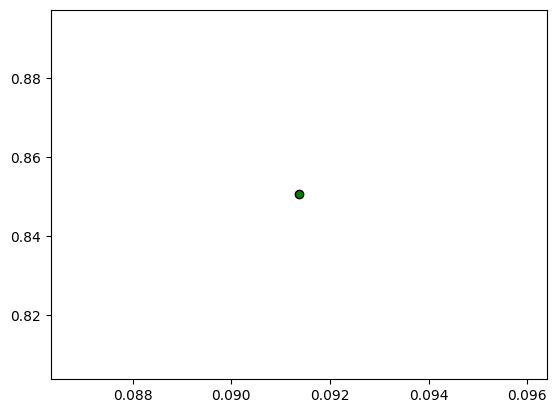

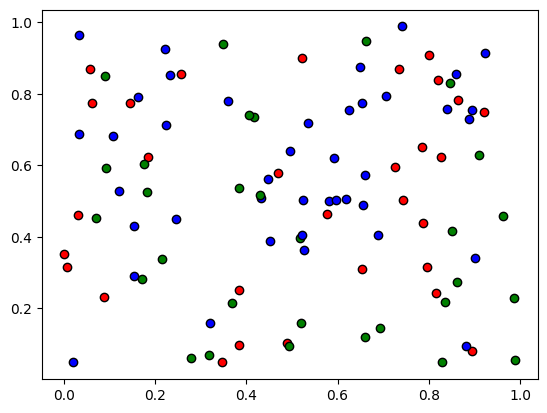

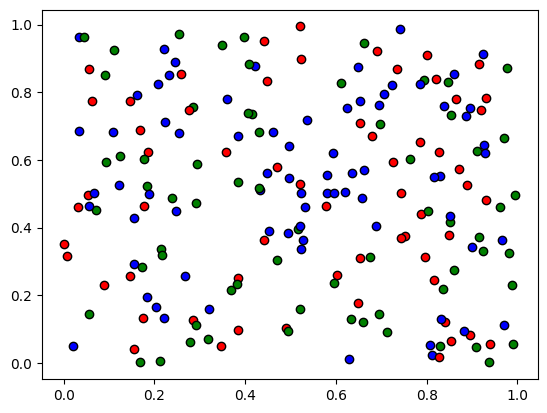

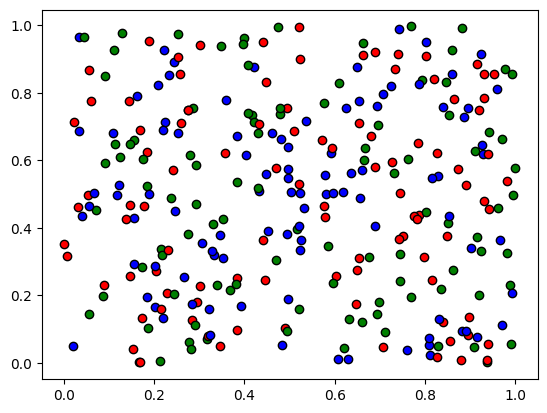

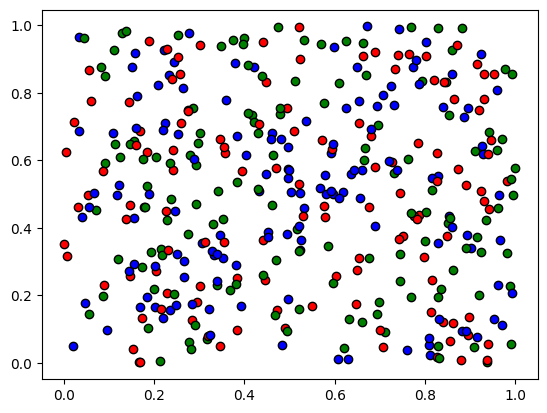

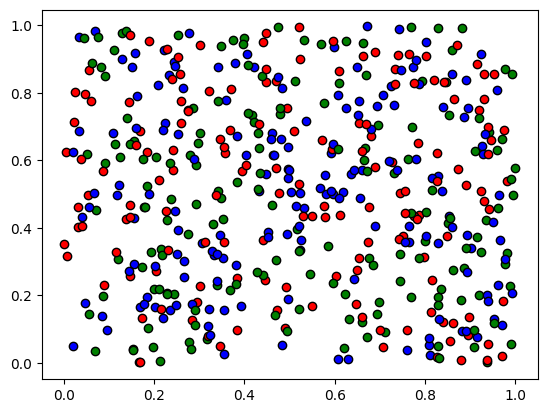

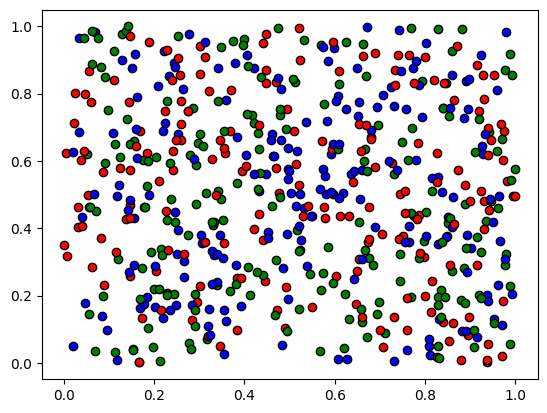

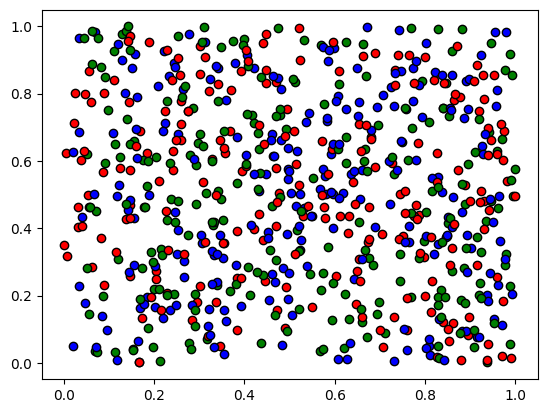

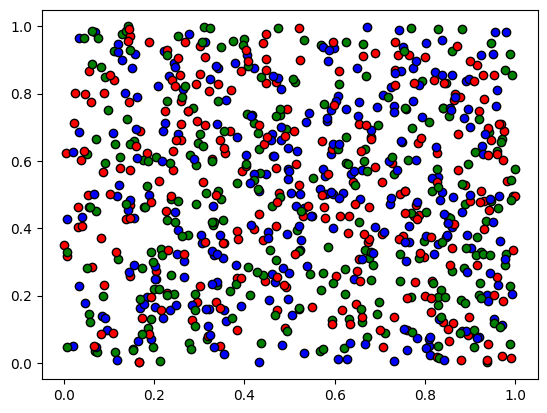

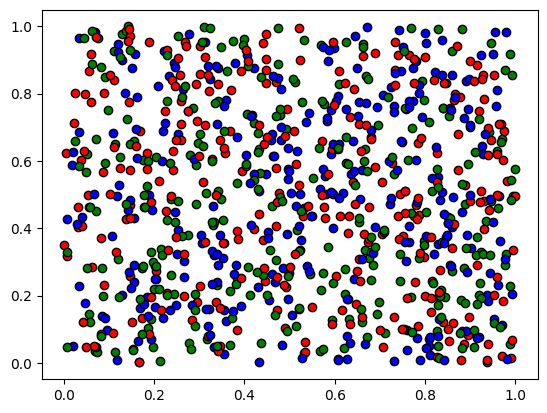

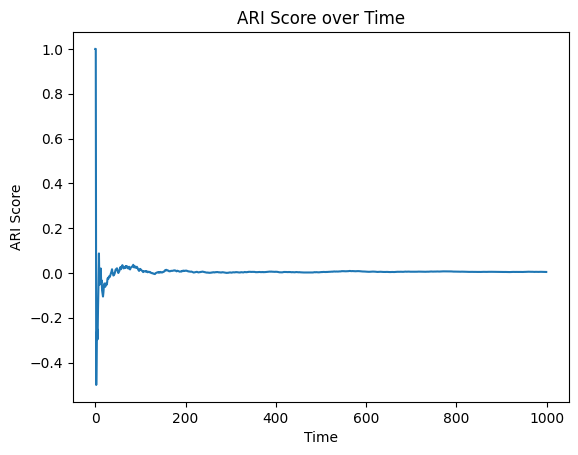

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Constants
RESERVOIR_SIZE = 100  # Size of the reservoir
FEATURE_SIZE = 10  # Number of features in each data point
EPSILON = 0.5  # DBSCAN parameter
MIN_SAMPLES = 5  # DBSCAN parameter

# Initialize AR-NG parameters
def InitializeParameters():
    # Initialize reservoir neurons
    reservoir = []
    for _ in range(RESERVOIR_SIZE):
        neuron = {
            'activation': 0,
            'cluster': None,
            'position': np.zeros(FEATURE_SIZE),
            'neighbors': []
        }
        reservoir.append(neuron)
    return reservoir

# Initialize clustering structure using Neural Gas
def InitializeNeuralGas(reservoir):
    # Assign random neighbors to each neuron
    for neuron in reservoir:
        num_neighbors = np.random.randint(1, 5)
        neuron['neighbors'] = np.random.choice(reservoir, size=num_neighbors, replace=False).tolist()

# Initialize adaptive parameters for reservoir computing
def InitializeAdaptiveParameters():
    return None  # Placeholder for adaptive parameters

# Function to calculate activation level based on similarity
def CalculateActivationLevel(neuron, dataPoint):
    return np.random.rand()

# Function to activate reservoir neurons based on data point
def ActivateReservoirNeurons(reservoir, dataPoint):
    for neuron in reservoir:
        activationLevel = CalculateActivationLevel(neuron, dataPoint)
        neuron['activation'] = activationLevel

# Function to perform competitive learning and find the winning neuron
def CompetitiveLearning(reservoir):
    winningNeuron = None
    highestActivation = -np.inf
    for neuron in reservoir:
        if neuron['activation'] > highestActivation:
            highestActivation = neuron['activation']
            winningNeuron = neuron
    return winningNeuron

# Function to update clustering structure based on winning neuron and neighbors
def UpdateClusteringStructure(winningNeuron):
    UpdateNeuron(winningNeuron)
    for neighborNeuron in winningNeuron['neighbors']:
        UpdateNeuron(neighborNeuron)

# Function to update a neuron's cluster and position
def UpdateNeuron(neuron):
    neuron['cluster'] = np.random.randint(0, 3)
    neuron['position'] = np.random.rand(FEATURE_SIZE)

# Function to detect concept drift based on density-based clusters
def DetectConceptDrift(clusters):
    # Simulate concept drift detection based on cluster changes
    return np.random.rand() < 0.1

# Function to handle concept drift based on density-based clusters
def HandleConceptDrift(clusters):
    # Placeholder for concept drift handling actions
    pass

# Function to update adaptive parameters for reservoir computing
def UpdateAdaptiveParameters(clusters):
    if DetectConceptDrift(clusters):
        AdaptReservoirParameters()

# Function to adapt reservoir parameters
def AdaptReservoirParameters():
    # Placeholder for reservoir parameter adaptation
    pass

# Function to generate synthetic data stream
def GenerateDataStream(num_points):
    dataStream = []
    for _ in range(num_points):
        dataPoint = np.random.rand(FEATURE_SIZE)
        dataStream.append(dataPoint)
    return dataStream

# Function to perform real-time analysis and decision-making
def PerformAnalysis(clusters):
    # Placeholder for analysis and decision-making
    pass

# Function to plot clusters
def PlotClusters(dataStream, clusters):
    colors = ['r', 'g', 'b']
    for i, dataPoint in enumerate(dataStream):
        if clusters[i] != -1:
            color = colors[clusters[i]]
            plt.scatter(dataPoint[0], dataPoint[1], c=color, edgecolors='k')
        else:
            plt.scatter(dataPoint[0], dataPoint[1], c='gray', edgecolors='k')
    plt.show()

# Function to evaluate clustering performance using adjusted Rand index
def EvaluateClusteringPerformance(true_labels, predicted_labels):
    return adjusted_rand_score(true_labels, predicted_labels)

# Main function
if __name__ == '__main__':
    # Initialize parameters
    reservoir = InitializeParameters()
    InitializeNeuralGas(reservoir)
    adaptiveParameters = InitializeAdaptiveParameters()

    # Generate synthetic data stream
    dataStream = GenerateDataStream(1000)

    # Initialize variables
    clusters = np.zeros(len(dataStream), dtype=int)
    ari_scores = []
    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []

    # Generate true labels for evaluation
    true_labels = np.random.randint(0, 3, len(dataStream))

    # Perform online clustering
    for i, dataPoint in enumerate(dataStream):
        # Activate reservoir neurons
        ActivateReservoirNeurons(reservoir, dataPoint)

        # Perform competitive learning and update clustering structure
        winningNeuron = CompetitiveLearning(reservoir)
        UpdateClusteringStructure(winningNeuron)

        # Update adaptive parameters
        UpdateAdaptiveParameters(clusters)

        # Store cluster assignment
        clusters[i] = winningNeuron['cluster']

        # Detect and handle concept drift
        if i % 100 == 0:
            if DetectConceptDrift(clusters[:i+1]):
                HandleConceptDrift(clusters[:i+1])

        # Perform analysis and decision-making
        PerformAnalysis(clusters[:i+1])

        # Plot intermediate clustering result
        if i % 100 == 0:
            PlotClusters(dataStream[:i+1], clusters[:i+1])

        # Evaluate clustering performance
        ari = EvaluateClusteringPerformance(true_labels[:i+1], clusters[:i+1])
        ari_scores.append(ari)

    # Plot ARI scores over time
    plt.plot(ari_scores)
    plt.xlabel('Time')
    plt.ylabel('ARI Score')
    plt.title('ARI Score over Time')
    plt.show()

